In [10]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib

In [4]:
r = requests.get('https://us-central1-safe-21981.cloudfunctions.net/events')
body_json = r.json()

points = body_json['points']
print(points)

[{'time': 1567894924872, 'location': {'_latitude': '39.95791709239022', '_longitude': '-75.2024651999179'}}, {'time': 1567895181445, 'location': {'_latitude': '39.9549936922459', '_longitude': '-75.18311094320366'}}, {'location': {'_latitude': '39.95406149682866', '_longitude': '-75.18951212968872'}, 'time': 1567894917662}, {'location': {'_latitude': '39.95259833333333', '_longitude': '-75.16519833333334'}, 'time': 1567897641359}, {'time': 1567898051277, 'location': {'_latitude': '39.95635330594706', '_longitude': '-75.17059126923732'}}, {'location': {'_latitude': '39.956170914699186', '_longitude': '-75.18939345099731'}, 'time': 1567894919457}, {'location': {'_latitude': '39.95635330594706', '_longitude': '-75.17059126923732'}, 'time': 1567898051366}, {'time': 1567894923179, 'location': {'_latitude': '39.957501100714246', '_longitude': '-75.19744180958597'}}, {'location': {'_latitude': '39.95607812047661', '_longitude': '-75.1931172930985'}, 'time': 1567894921250}, {'location': {'_lat

In [5]:
points_list = []

for p in points:
    p_flat = []
    p_flat.append(
        float(p['location']['_latitude'])
    )
    p_flat.append(
        float(p['location']['_longitude'])
    )
    p_flat.append(
        int(p['time'])
    )
    points_list.append(p_flat)

In [6]:
df = pd.DataFrame(points_list)
df.columns = ['Lat', "Lng", 'Time']
df.sort_values('Time')
df = df.reset_index(drop=True)
df

,Lat,Lng,Time
0,39.957917,-75.202465,1567894924872
1,39.954994,-75.183111,1567895181445
2,39.954061,-75.189512,1567894917662
3,39.952598,-75.165198,1567897641359
4,39.956353,-75.170591,1567898051277
5,39.956171,-75.189393,1567894919457
6,39.956353,-75.170591,1567898051366
7,39.957501,-75.197442,1567894923179
8,39.956078,-75.193117,1567894921250
9,39.951296,-75.192740,1567897246041


In [7]:
df_coordinates = df.drop(columns=['Time'])
df_coordinates

,Lat,Lng
0,39.957917,-75.202465
1,39.954994,-75.183111
2,39.954061,-75.189512
3,39.952598,-75.165198
4,39.956353,-75.170591
5,39.956171,-75.189393
6,39.956353,-75.170591
7,39.957501,-75.197442
8,39.956078,-75.193117
9,39.951296,-75.192740


In [8]:
df_coordinates.plot()

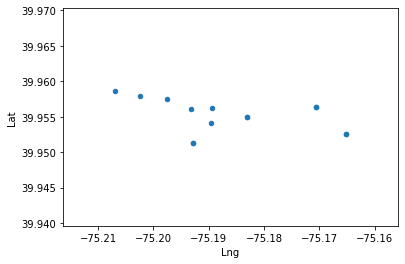

In [9]:
df_coordinates.plot.scatter(x='Lng', y='Lat')